In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv("TSLA.csv")
data.head()
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,64.594124,65.883341,63.272302,64.642060,64.642060,3.979012e+07
std,33.400757,34.457933,32.308613,33.518742,33.518742,2.928062e+07
min,28.464001,30.993999,28.209999,28.733999,28.733999,3.540000e+06
25%,45.861999,46.425002,45.063001,45.887001,45.887001,2.158075e+07
50%,56.765999,57.888000,55.776001,56.945999,56.945999,3.081300e+07
75%,67.962001,69.039001,66.736000,67.790001,67.790001,4.658400e+07
max,281.002014,285.899994,270.256012,278.855988,278.855988,3.046940e+08


In [5]:
# Select only the important features i.e. the date and price
data = data[["Date","Close"]] # select Date and Price# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the datasetdata.head(5)

In [7]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

Initial log joint probability = -107.131


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3197.85     0.0772856       703.796           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3279.16    0.00353753       224.377           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3332.13     0.0200183       588.818           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3349.03     0.0169505       493.457           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     482       3368.33   0.000118613       349.969   2.129e-07       0.001      652  LS failed, Hessian reset 
     499       3372.86   0.000677084       110.445           1           1      6

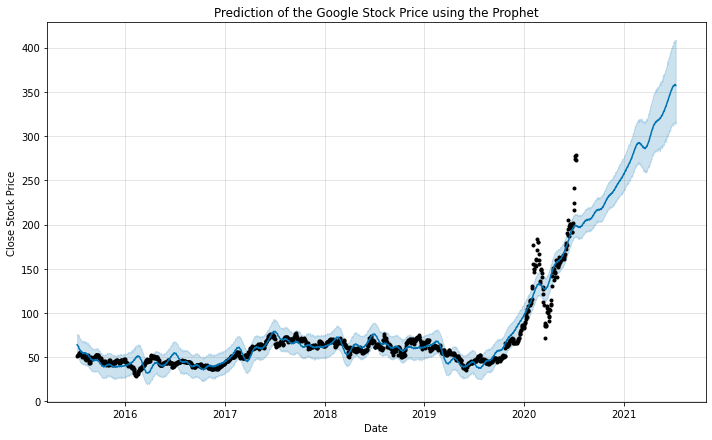

In [9]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Google Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()